In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.


In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

print("train data:",'images:',x_train_image.shape," labels:",y_train_label.shape) 
print("test  data:",'images:',x_test_image.shape ," labels:",y_test_label.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


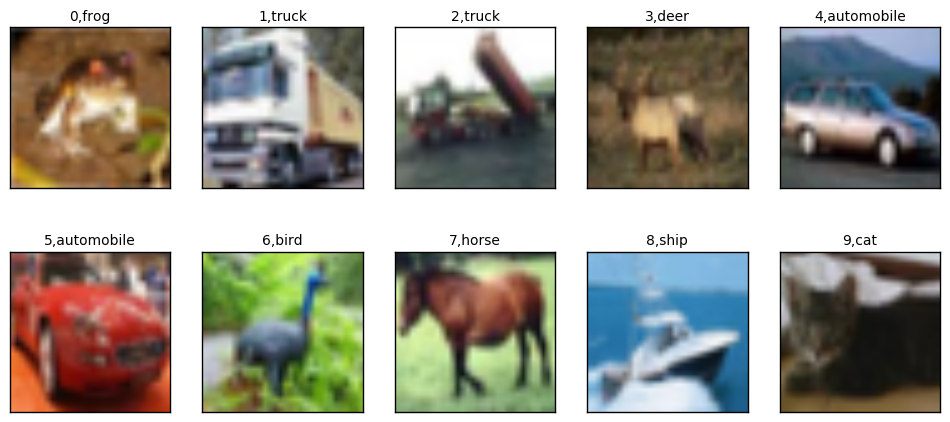

In [3]:
#label_dict={0:"飞机",1:"汽车",2:"鸟",3:"猫",4:"鹿",5:"狗",6:"青蛙",7:"马",8:"船",9:"卡车"}
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['SimHei']

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

#查看预测概率
def show_predicted_probability(y_test_label, pred, x_test_image, predicted_probability, i):
    print('label:',label_dict[y_test_label[i][0]], 'predict:',label_dict[pred[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_image[i],(32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(predicted_probability[i][j]))


#查看图像
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+ ',' +label_dict[labels[i][0]]
        if(len(prediction) > 0):
            title += "=>" + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()
    
plot_images_labels_prediction(x_train_image, y_train_label, [], 0)

In [4]:
#标准化
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

#执行one-hot encoding转换
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

y_test_one_hot.shape

(10000, 10)

In [5]:
#建立模型
model = Sequential()
#卷积层1
model.add(Conv2D(
        filters=32,#卷积层中使用的卷积核的个数
        kernel_size=(3, 3),#卷积核的大小3*3
        input_shape=(32, 32, 3),#输入大小32*32 ，最后一个维度是通道维，表示颜色通道数
        activation='relu', #激活函数
        padding='same'))#
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷积层2
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷积层3
model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#全连接层
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [6]:
try:
    model.load_weights("../saveModel/cifarCnnModel.h5")
    print("加载模型成功")
except :    
    print("加载模型失败")

加载模型成功


In [ ]:
# 定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#开始训练
train_history = model.fit(x_train_normalize, y_train_one_hot, validation_split=0.2, epochs=1, batch_size=300, verbose=1)  

In [ ]:
model.save_weights("saveModel/cifarCnnModel.h5")
print("保存成功")

In [ ]:
show_train_history(train_history, 'acc', 'val_acc')

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
#评估模型准确率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy=', score[1])

In [ ]:
pred = model.predict_classes(x_test_normalize)
pred

In [ ]:
plot_images_labels_prediction(x_test_image, y_test_label, pred, 0, 10)

In [ ]:
#查看预测概率
predicted_probability = model.predict(x_test_normalize)

In [ ]:
show_predicted_probability(y_test_label, pred, x_test_image, predicted_probability, 0)

In [ ]:
show_predicted_probability(y_test_label, pred, x_test_image, predicted_probability, 3)

In [ ]:
import pandas as pd
#转换为1维矩阵
#y_test_label.reshape(-1)
print(label_dict)
pd.crosstab(y_test_label.reshape(-1), pred, rownames=['label'], colnames=['predict'])